# Práctica de regresión lineal


Revisar el video disponible [aquí](https://www.youtube.com/watch?v=k964_uNn3l0)

## Cargamos los módulos a utilizar

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

## Usando el dataset diabetes de sklearn

### Cargamos el dataset

Usaremos el dataset [diabetes](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) que nos proporciona el módulo sklearn.

In [3]:
# cargamos el dataset diabetes
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [4]:
print(diabetes_X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]


In [5]:
print(diabetes_y)

[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91. 116.  86. 122.
  72. 

In [6]:
# Usaremos solo una característica
diabetes_X = diabetes_X[:, np.newaxis, 2]  #Tomanos la columna del bmi

In [ ]:
print(diabetes_X)
print(len(diabetes_X))

El código anterior está tomando la tercera característica de la matriz de características original diabetes_X y remodelándola para crear una matriz bidimensional. Esta operación es a menudo necesaria cuando se trabaja con scikit-learn, ya que espera datos de entrada en un formato determinado, por lo general una matriz 2D donde cada fila corresponde a una muestra y cada columna corresponde a una característica.

### Dividimos el dataset de características (features) en entrenamiento y prueba

In [10]:
# dividimos los datos relacionados a las características en entrenamiento y prueba
diabetes_X_train = diabetes_X[:-60]
diabetes_X_test = diabetes_X[-60:]

### Dividimos el dataset de valores objetivo en entrenamiento y prueba

In [11]:
# dividimos los datos de los valores objetivo en entrenamiento y prueba
diabetes_y_train = diabetes_y[:-60]
diabetes_y_test = diabetes_y[-60:]

### Creamos el objeto de regresión lineal

In [12]:
regr_lineal = linear_model.LinearRegression()

### Entrenamos el modelo

In [13]:
regr_lineal.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

### Realizamos predicciones utilizando el conjunto de datos de prueba

In [14]:
# hacemos predicciones usando el conjunto de datos de prueba
diabetes_y_pred = regr_lineal.predict(diabetes_X_test)

### Revisamos los coeficientes

In [15]:
print("Coeficiente: ", regr_lineal.coef_[0])
print("Intercepto: ", regr_lineal.intercept_)

Coeficiente:  940.0557408250678
Intercepto:  152.80161883617293


### Revisamos el coeficiente de determinación: 1 es predicción perfecta

In [16]:
print("Coeficiente de determinación (R²): %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coeficiente de determinación (R²): 0.41


### Revisamos el valor de error cuadrático medio (mse)

In [17]:
print("Error cuadrático medio (mse): %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

Error cuadrático medio (mse): 3490.60


### Graficamos las salidas

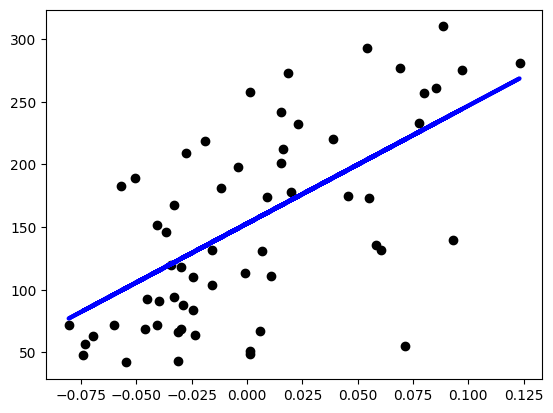

In [18]:
# graficar salidas
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

## Usando el dataset Weather Conditions in World War Two

Buscaremos dar respuesta a las interrogantes:

- Existe relación entre las temperaturas mínima y máxima diarias.
- Se puede predecir la temperatura máxima dada una temperatura mínima.

La descripción del dataset puede revisarse [aquí](https://www.kaggle.com/datasets/smid80/weatherww2/data).

### Cargamos el dataset

In [19]:
import pandas as pd
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [20]:
# ruta al archivo
filepath = "https://raw.githubusercontent.com/vbatiz/intro-python/main/notebooks/data/summary_of_weather.csv"
datos = pd.read_csv(filepath)

<ipython-input-20-6bad62d846ce>:3: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_csv(filepath)


In [21]:
datos.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

<Axes: xlabel='MinTemp'>

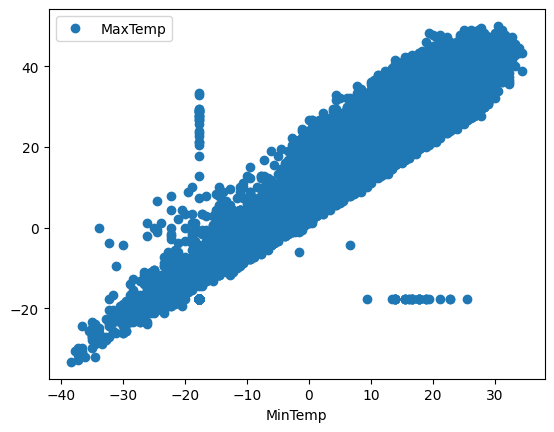

In [23]:
# revisemos la relación
datos.plot(x='MinTemp',y='MaxTemp',style='o')

In [24]:
# obtenemos los datos para x y y
x=datos['MinTemp'].values
y=datos['MaxTemp'].values

In [25]:
x

array([22.22222222, 21.66666667, 22.22222222, ..., 18.33333333,
       18.33333333, 17.22222222])

In [26]:
# obtenemos los datos para x y y
x=datos['MinTemp'].values.reshape(-1,1)
y=datos['MaxTemp'].values.reshape(-1,1)

In [27]:
x

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [18.33333333],
       [18.33333333],
       [17.22222222]])

### Dividimos los datos en entrenamiento y prueba

In [30]:
# separar los datos
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.30)

### Creamos el modelo

In [31]:
# crear el modelo
model = LinearRegression()

### Entrenamos el modelo

In [32]:
# entrenar el modelo
model.fit(x_train, y_train)

LinearRegression()

### Realizamos predicciones con los datos de prueba

In [33]:
# realizar predicciones
y_predict=model.predict(x_test)

### Revisamos los coeficientes

In [34]:
print("Coeficiente:", model.coef_[0])
print("Intercepto:", model.intercept_)
print(f"y = {model.coef_[0][0]}x + {model.intercept_[0]}")
print("Coeficiente de determinación (R²): %.2f" % r2_score(y_test, y_predict))

Coeficiente: [0.91765806]
Intercepto: [10.72236813]
y = 0.91765806420861x + 10.72236812780244
Coeficiente de determinación (R²): 0.77


### Agrupamos los datos de prueba reales y las predicciones para visualización

In [35]:
datos2=pd.DataFrame({'mínima':x_test.flatten(),'máxima real':y_test.flatten(),'máxima predicción':y_predict.flatten()})
datos2

,mínima,máxima real,máxima predicción
0,17.222222,26.111111,26.526479
1,25.555556,30.555556,34.173630
2,21.111111,30.000000,30.095149
3,6.666667,13.888889,16.840089
4,21.111111,32.777778,30.095149
...,...,...,...
35707,12.777778,20.555556,22.447999
35708,13.888889,17.222222,23.467619
35709,26.111111,28.888889,34.683440
35710,19.444444,25.555556,28.565719


### Graficamos

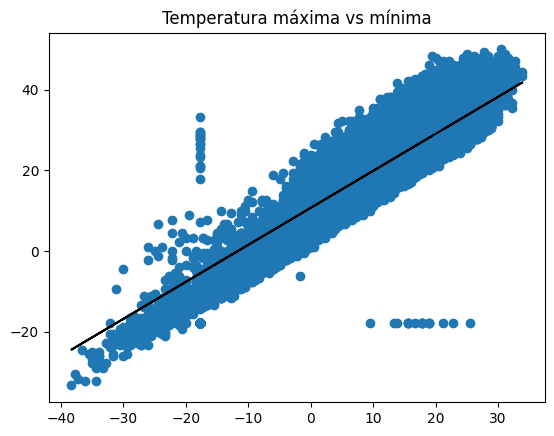

In [36]:
plt.scatter(x_train,y_train)
plt.title("Temperatura máxima vs mínima")
plt.plot(x_train,model.predict(x_train),color='black')

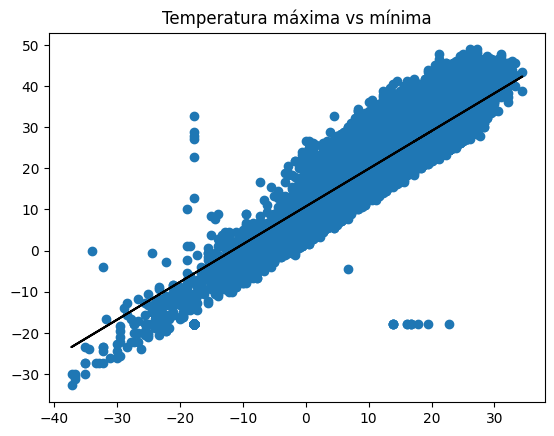

In [37]:
plt.scatter(x_test,y_test)
plt.title("Temperatura máxima vs mínima")
plt.plot(x_test,model.predict(x_test),color='black')

In [39]:
x_train

array([[19.44444444],
       [18.33333333],
       [ 1.11111111],
       ...,
       [22.77777778],
       [27.22222222],
       [21.11111111]])

In [40]:
b = 20
b = np.array(b)
b = np.array(b.reshape(-1,1))
print(b)

[[20]]


In [41]:
b=20
c = [[b]]
print(c)

[[20]]


In [ ]:
a = np.array([[20]])
print(model.predict(b))

In [44]:
temp_minima = float(input("Dame la temperatura mínima: "))
temp_minima = np.array([[temp_minima]])
print(temp_minima)
print(model.predict(temp_minima))

Dame la temperatura mínima: 30
[[30.]]
[[38.25211005]]


In [46]:
#y = 0.91765806420861x + 10.72236812780244
valor_x = float(input("Dame la temperatura mínima: "))
valor_y = 0.91765806420861 * valor_x + 10.72236812780244
print(valor_y)

Dame la temperatura mínima: 30
38.252110054060736
